In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Importiamo questa volta anche il modulo os e i moduli layers e model di Tensorflow,
# per poter scrivere semplicemente layes o models inveve di tf.keras.layers e 
# tf.keras.models.

import os
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

# Dogs vs Cats

In [5]:
# Scarichiamo l'insieme di dati, che si trova su un file ZIP. A differenza degli altri
# esempi usati fin'ora, questo insieme di dati non è integrato in Keras.

# Notare l'uso del punto esclamativo che serve ad eseguire un comando del sistema
# operativo sottostante (Linux in questo caso).

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


--2022-03-31 08:23:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   222MB/s    in 0.3s    

2022-03-31 08:23:14 (222 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [6]:
# Decomprimo il file zip, sempre usando i comandi del sistema operativo

! unzip -q -d /tmp /tmp/cats_and_dogs_filtered.zip

In [7]:
# Scecifica le cartelle in cui risiedono i dati di training e di addestramento.
# Usiamo il metodo os.path.join in modo che il codice sia compatibile su tutti
# i sistemi operativi (Windows usa \ come separatore di cartelle, mentre Linux
# e MacOS usano /)

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
# La classe ImageDataGenerator si occupa di leggere le immagini da un file, eventualmente
# manipolandele. Nel nostro caso, 
# - carica le immagini JPEG e le decodifica
# - riduce tutte le immagini alla risoluzione di 150 x 150 pixel
# - normalizza i valori di tutti i pixel nell'intervallo [0, 1]
# - organizza le immagini in batch, ognuno composto da 20 immagini

# ImageDataGenerator carica in memoria un batch alla volta. Questo consente di analizzare
# anche dati molto grandi (BigData ?) che non entrerebbero integralmente nella
# memoria del computer.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (150, 150), 
  batch_size = 20,
  class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
  validation_dir,
  target_size = (150, 150), 
  batch_size = 20,
  class_mode = 'binary')

for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
# Funzione per visualizzare l'evoluzione di loss e accuratezza al variare delle
# epoche, sia sull'insieme di addestramento che di validazione.

def plot_history(hist):
  acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']

  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  return plt

In [ ]:
# Creiamo una rete convoluzionale. Importiamo i pacchetti layers e models così
# non dobbiamo ogni volta riscrivere tf.keras.

network = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# Addestriamo la rete. Notare che:
# a. Non specifichiamo il batch_size, poiché è stato specificato come parametro di ImageDataGenerator
# b. Occorre invece specificare il numero di batch che servono per esaurire l'insieme di dati
#    nel parametro steps_per_epoch. Siccome l'insieme di training è formato da 2000
#    immagini e ogni batch è formato da 20 immagini, servono centro passi perché
#    la rete si sia addestrata su tutte le immagini a disposizione
# c. Analogamente in validation_steps dobbiamo mettere il numero di batch che compongono
#    l'insieme di validazione (1000/20 = 50)

history = network.fit(
  train_generator,
  steps_per_epoch=100,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=50)

Epoch 1/30
100/100 [==============================] - 116s 1s/step - loss: 0.7393 - accuracy: 0.5195 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 107s 1s/step - loss: 0.6936 - accuracy: 0.5760 - val_loss: 0.8270 - val_accuracy: 0.5860
Epoch 3/30
100/100 [==============================] - 109s 1s/step - loss: 0.6453 - accuracy: 0.6600 - val_loss: 0.8320 - val_accuracy: 0.5640
Epoch 4/30
100/100 [==============================] - 108s 1s/step - loss: 0.5943 - accuracy: 0.6955 - val_loss: 0.7036 - val_accuracy: 0.6070
Epoch 5/30
100/100 [==============================] - 109s 1s/step - loss: 0.5425 - accuracy: 0.7230 - val_loss: 0.5714 - val_accuracy: 0.7180
Epoch 6/30
100/100 [==============================] - 107s 1s/step - loss: 0.4978 - accuracy: 0.7610 - val_loss: 0.6247 - val_accuracy: 0.6880
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.4618 - accuracy: 0.7960 - val_loss: 0.5628 - val_accuracy: 0.7270

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

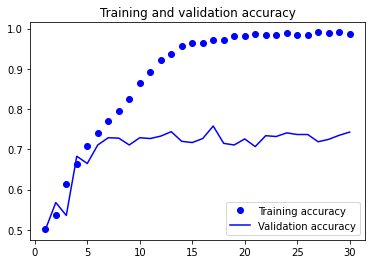

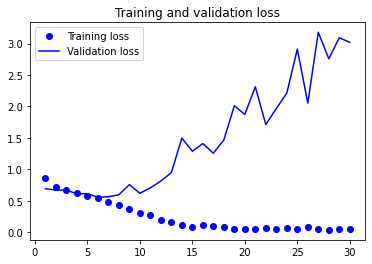

In [ ]:
# Visualizzando la storia di accuratezza e loss, notiamo un elevato overfitting,
# probabilmente dovuto alla scarsità di dati. L'accuratezza massima che è stata
# raggiunta sull'insieme di validazione è stata circa del 75% al'epoca 17.

plot_history(history)

In [ ]:
# Salvataggio della rete. In questo modo è possibile salvare la rete nello spazio
# disco del computer virtuale su cui sta girando il notebook. Da lì è possibile
# scarica tramite il file browser che ci mette a disposizione Google Colab (si
# trova nella cartella /content)

network.save('cats_and_dogs_small_1.h5')

In [ ]:
# In alternativa, possiamo salvare la rete su qualche storage cloud, ad esempio
# su Google Drive.

# "Montiamo" il proprio Google Drive come cartella "/content/drive" del sistema
# operativo sottostante. Questo comando funziona solo su Google Colab e non su 
# sistemi alternativi come Kaggle.

from google.colab import drive

drive.mount('/content/drive')

# Quindi diamo il comando di salvatggio ma all'interno della cartella '/content/drive/MyDrive/'

network.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning con Keras/cats_and_dogs_small_1.h5')

Mounted at /content/drive


# Data Augmentation

Visto che i dati a disposizione sono pochi, proviamo ad aumentarli artificialmente alterando quelli che abbiamo a disposizione.

In [ ]:
# Si può configurare la classe ImageDataGenerator di Keras per fare propro questo,
# altera le immagini durante il caricamento. I parametri rotation_range, width_shift_range,
# etc... specificano i tipi di alterazione a cui sottoporre, in maniera causale, le immagini.

example_datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True)

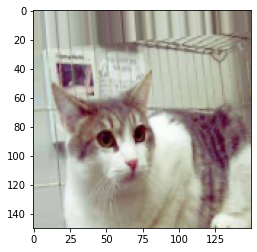

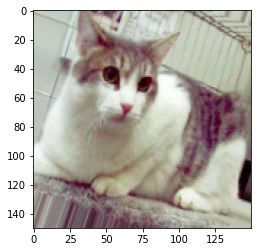

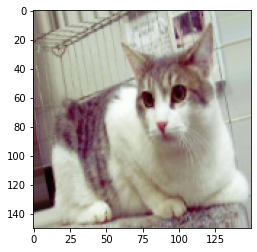

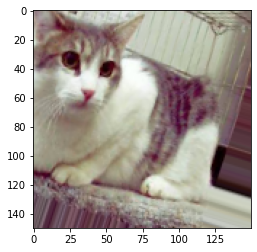

In [ ]:
# Questo è un esempio delle modifiche che vengono effettuate, a partire dalla
# immagine cat.770.jpg

img_path = os.path.join(train_cats_dir, 'cat.770.jpg')
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,)+ x.shape)

i = 0
for batch in example_datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

In [ ]:
# Cambiamo quindi il generatore di immagini per l'insieme di addestramento in modo
# da effettuare una serie di trasformazioni durante il caricamento.

train_datagen2 = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True)

validation_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')
  
validation_generator2 = validation_datagen2.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Riaddestriamo la stessa rete di prima ma usando il nuovo generatore di immagini.
# Notiamo che, poiché ad ogni epoca le immagini su cui viene addestrata la rete
# sono sempre diverse, l'addestramento procede in maniera meno lineare. Spesso
# l'accuratezza da una epoca alla successiva diminuisce, per poi magare aumentare
# di nuovo all'epoca ancora dopo.

# L'accuratezza di validazione massima è ora di circa l'83%.

network2 = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(512, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
network2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history2 = network2.fit(
  train_generator2,
  steps_per_epoch=100,
  epochs=60,
  validation_data=validation_generator2,
  validation_steps=50)

Epoch 1/60
100/100 [==============================] - 26s 249ms/step - loss: 0.7352 - acc: 0.5245 - val_loss: 0.6951 - val_acc: 0.5000
Epoch 2/60
100/100 [==============================] - 25s 251ms/step - loss: 0.6916 - acc: 0.5230 - val_loss: 0.8073 - val_acc: 0.5030
Epoch 3/60
100/100 [==============================] - 25s 247ms/step - loss: 0.6840 - acc: 0.5540 - val_loss: 0.6392 - val_acc: 0.6610
Epoch 4/60
100/100 [==============================] - 23s 234ms/step - loss: 0.6683 - acc: 0.5920 - val_loss: 0.6561 - val_acc: 0.5930
Epoch 5/60
100/100 [==============================] - 24s 239ms/step - loss: 0.6526 - acc: 0.6305 - val_loss: 0.6088 - val_acc: 0.6530
Epoch 6/60
100/100 [==============================] - 22s 222ms/step - loss: 0.6363 - acc: 0.6455 - val_loss: 0.6082 - val_acc: 0.6340
Epoch 7/60
100/100 [==============================] - 21s 214ms/step - loss: 0.6517 - acc: 0.6365 - val_loss: 0.6376 - val_acc: 0.5970
Epoch 8/60
100/100 [==============================] - 2

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

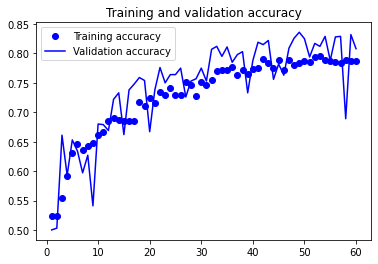

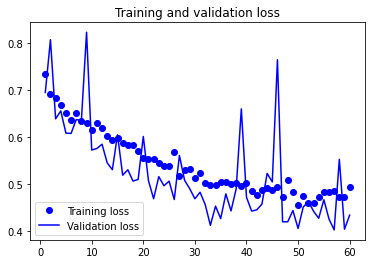

In [ ]:
# Notare che adesso il fenomeno di overfitting è ridotto e si raggiunge una
# precisione maggiore rispetto al caso precedente.

plot_history(network2.history)

In [ ]:
# Salviamola su Google Drive

network.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning con Keras/cats_and_dogs_small_2.h5')

# Visualizzazione degli strati intermedi

Fin'ora abbiamo ignorato gli output degli strati intermedi delle reti neurali. Ci siamo solo interessati degli input (immagini o review di IMDB) e output dell'ultimo stato (il risultato dell classificazione). Tuttavia, l'output degli
strati intermedi convoluzionali sono interessanti per capire come funziona una rete neurale convoluzionale.

In [ ]:
# Ricarichiamo la rete neurale dell'esempio precedente da Google Drive (non è
# necessaria ricaricarla se è già in meemoria). Rimontiamo Google Drive nel caso
# non fosse già stato fatto in precedenza.

from google.colab import drive

drive.mount('/content/drive')

network2 = models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning con Keras/cats_and_dogs_small_2.h5')
network2.summary()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7385

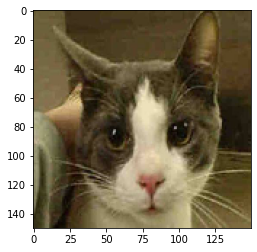

In [ ]:
# Questa è l'immagine che daremo in input alla rete neurale per verificare cosa
# accade negli strati intermedi.

img_path = os.path.join(validation_cats_dir,'cat.2200.jpg')
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

plt.imshow(img_tensor[0])

In [ ]:
# Prendo i primi 8 strati della rete e costruisco un modello che ha quegli strati
# come output. Un oggetto di classe "Model" e come una rete neurale ma con più strati
# di output invece che uno solo.

layer_outputs = [ layer.output for layer in network2.layers[0:8] ]
activation_model = models.Model(inputs=network2.input, outputs=layer_outputs)

In [ ]:
# Calcoliamo le attivazioni (gli output degli strati intermedi) per le immagini
# di cui sopra. Il risultato è una lista di 8 elementi, ogni elemento è l'output
# di uno strato della rete convoluzionale.

activations = activation_model.predict(img_tensor)

In [ ]:
# Il primo layer di attivazione è un tensore 1 * 148 * 148 * 32.
# - 32 deriva dal fatto che abbiamo 32 filtri nel primo strato convoluzionale
# - 148 è la dimensione dell'immagine risultante da ognuno dei filtri
# - 1 è il numero di immagini su cui abbiamo effettuato la predizione

activations[0].shape

(1, 148, 148, 32)

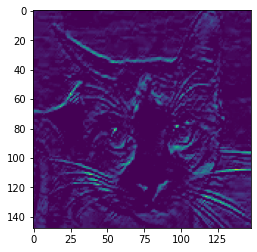

In [ ]:
# Visualizziamo il canale n. 4 della attivazione del primo strato. Sembra che questo
# canale, in qualche modo enfatizzi le righe orizzontali.

plt.imshow(activations[0][0,:,:,4])

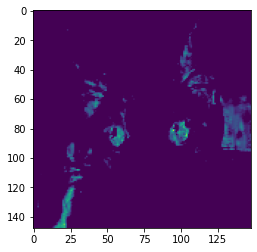

In [ ]:
# Visualizziamo invece il canale n. 14 della attivazione del primo strato. Qusto
# seembra mettere in evidenza gli occhi.

plt.imshow(activations[0][0,:,:,14])

In [ ]:
# Questo codice visualizza tutte le attivazioni di tutti gli strati convoluzionali.
# Notare che i primi strati generano attivazioni che sono alterazioni dell'immagine
# di partenza, mentre gli strati più avanzati hanno meno corrispondenza con l'immagine
# iniziale.

def plot_all_activations(activation_model, img):
  activations = activation_model.predict(img)
  layer_names = []
  for layer in activation_model.outputs:
      layer_names.append(layer.name)
  images_per_row = 16

  for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
      for row in range(images_per_row):
        channel_image = layer_activation[0,:,:,col*images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


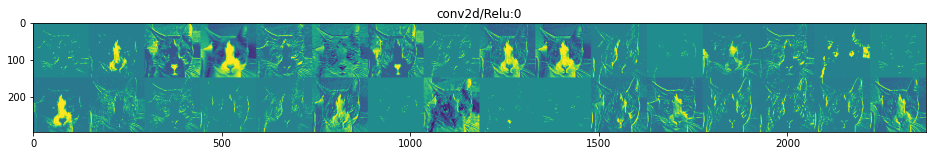

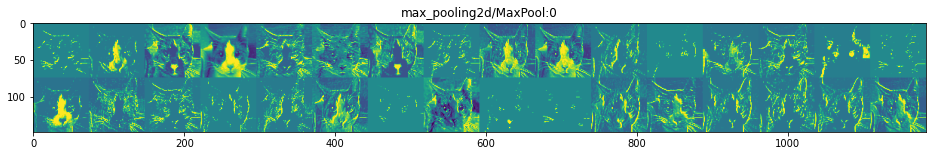

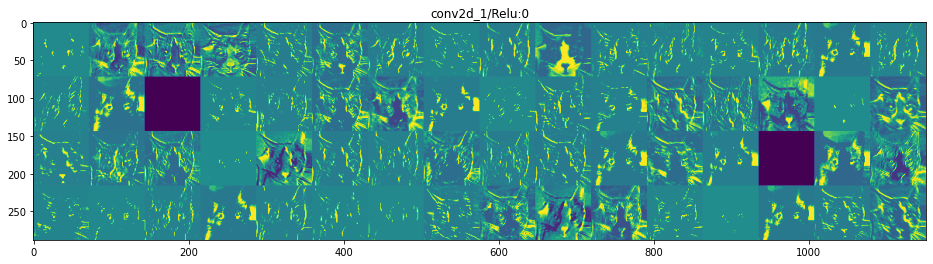

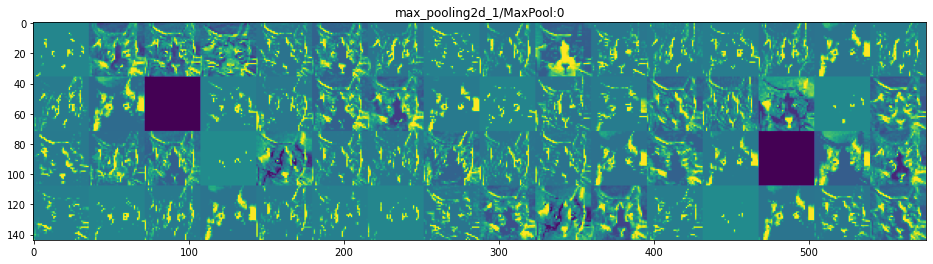

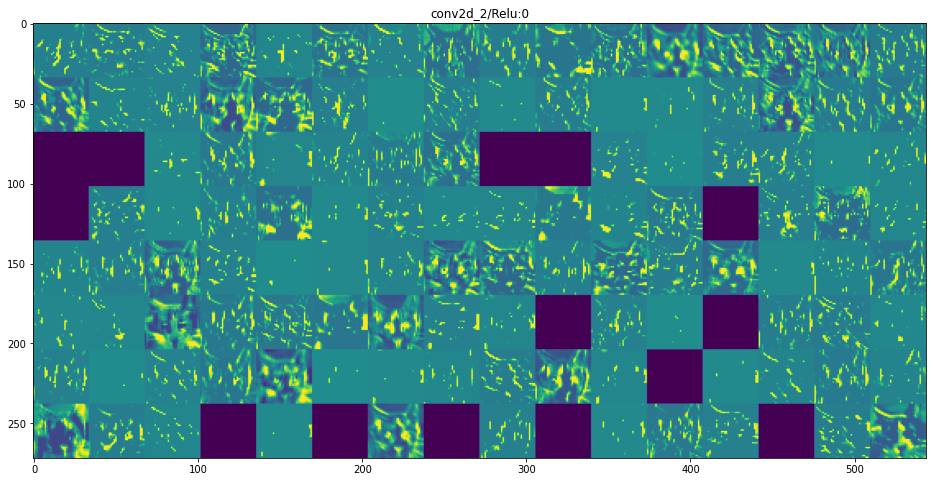

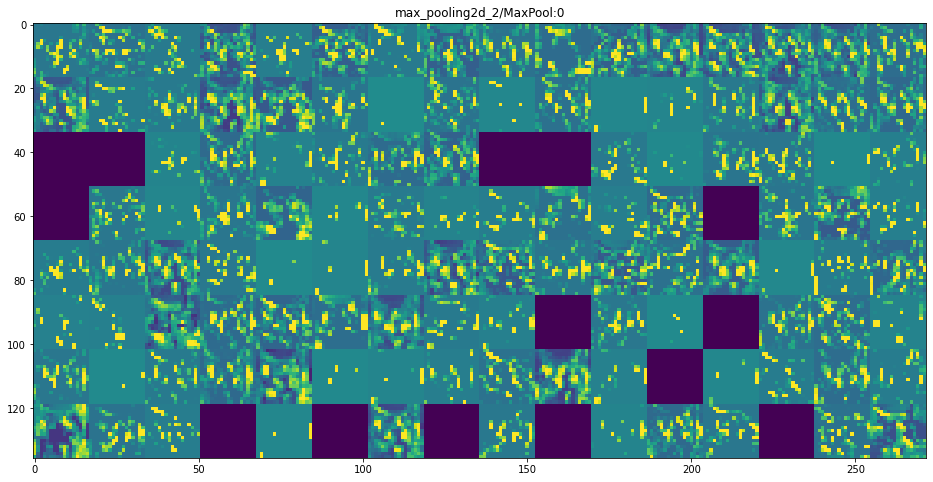

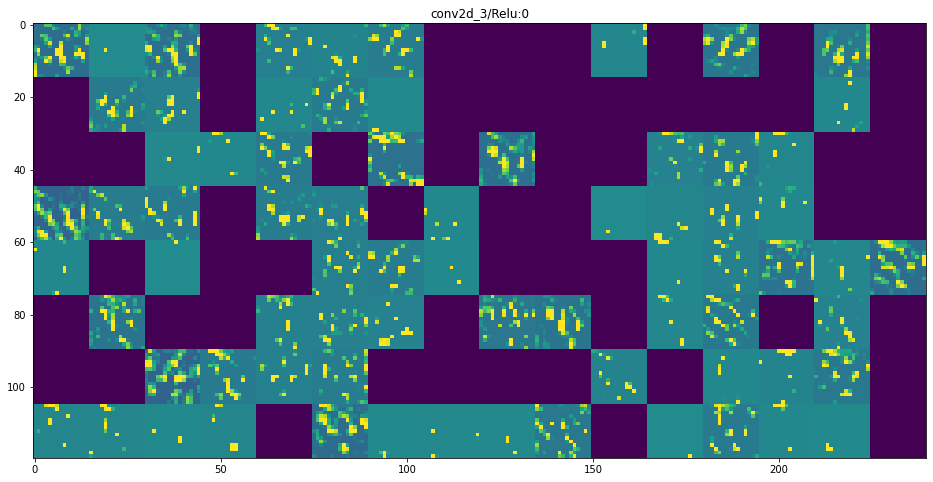

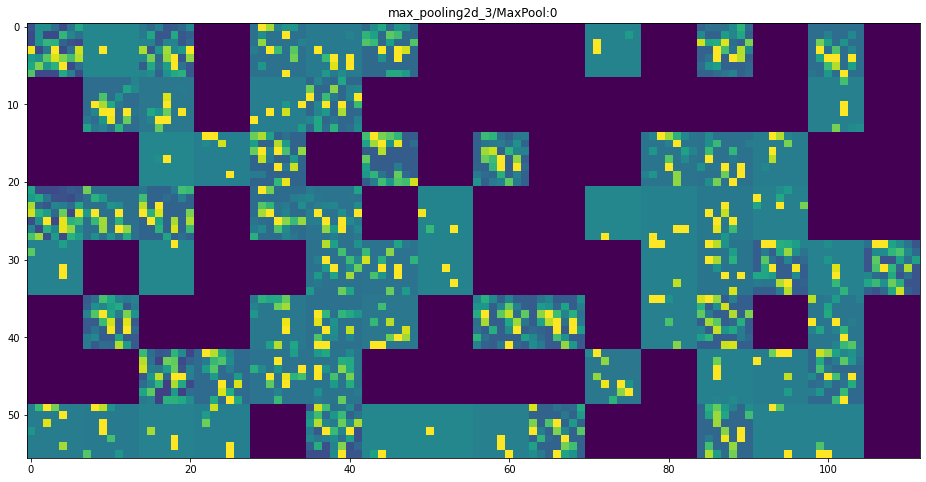

In [ ]:
plot_all_activations(activation_model, img_tensor)

# Visualizzazione degli strati intermedi della rete VGG16

Ripetiamo la stessa cosa con un'altra rete neurale, la VGG16, che è stata la vincitrice della competizione ILSVR (ImageNet). Notare che VGG16 non è stata
addestrata sull'insieme di cani e gatti che abbiamo usato fin'ora, ma su un insieme di immagini chiamato ImageNet che comprende foto di vari animali (tra cui cani e gatti).

In [8]:
# Carichiamo la rete VGG16, che è stanta la vincitrice della competizione ILSVR (Imagenet)
# nel 2014,

vgg16 = tf.keras.applications.VGG16(weights='imagenet')
vgg16.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

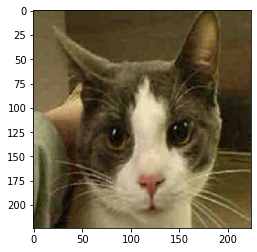

In [17]:
# Questa è l'immagine che daremo in input alla rete neurale

img_path_cat = os.path.join(validation_cats_dir,'cat.2200.jpg')
img_cat = tf.keras.preprocessing.image.load_img(img_path_cat, target_size=(224, 224))

plt.imshow(img_cat)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


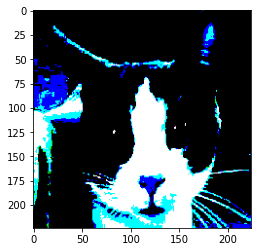

In [18]:
# Le immagini per VGG16 devono prima essere pre-processate prima di poter essere
# date in input alla rete neurale. Questo a è l'immagine di cui sopra dopo la fase
# di pre-processing.

img_cat_processed = tf.keras.preprocessing.image.img_to_array(img_cat)
img_cat_processed = np.expand_dims(img_cat_processed, axis=0)
img_cat_processed = tf.keras.applications.vgg16.preprocess_input(img_cat_processed)
plt.imshow(img_cat_processed[0])

In [ ]:
# Queste sono le predizioni di VGG16 (un vettore binario di 1000 valori numerici,
# corrispondenti alla probabilità che l'immagine ricada in una delle 1000 classi
# riconosciute)

preds = vgg16.predict(img_cat_processed)
preds.shape

(1, 1000)

In [ ]:
 # Possiamo usare il metodo decode_predictioons per interpretare il risultato. Si
 # vede che l'immagine è riconosciuta come gatto egizian.

tf.keras.applications.vgg16.decode_predictions(preds)

49152/35363 [=========================================] - 0s 0us/step


[[('n02124075', 'Egyptian_cat', 0.3185682),
  ('n02127052', 'lynx', 0.065172896),
  ('n02123045', 'tabby', 0.04624494),
  ('n02123159', 'tiger_cat', 0.041525222),
  ('n02123597', 'Siamese_cat', 0.032978665)]]

In [ ]:
# Prendiamo i primi 19 strati convulozionali e di pooling della rete e costruiamo un
# modello che ha quegli strati come output. Un oggetto di classe "Model" e come
# una rete neurale ma con più strati di output invece che uno solo.

# Notare che il primo blocco convoluzionale è il layer 1 e non lo 0, per la presenza
# di uno strato di input nella rete VGG16 che avevamo sempre omesso nei nostri
# esperimenti.

layer_outputs = [ layer.output for layer in vgg16.layers[1:19] ]
activation_model = tf.keras.models.Model(inputs=vgg16.input, outputs=layer_outputs)

In [ ]:
# Calcoliamo le attivazioni (gli output degli strati intermedi) per le immagini
# di cui sopra. Il risultato è una lista di 18 elementi, ogni elemento è l'output
# di uno strato della rete convoluzionale.

activations = activation_model.predict(img_cat_processed)

In [ ]:
# L'attivazione del primo blocco convoluzionale (block1_conv1) è un tensore 1 * 224 * 224 * 64.
# - 64 deriva dal fatto che abbiamo 64 canali nel primo strato convoluzionale
# - 148 è la dimensione dell'immagine risultante da ognuno dei filtri
# - 1 è il numero di immagini su cui abbiamo effettuato la predizione

activations[0].shape

(1, 224, 224, 64)

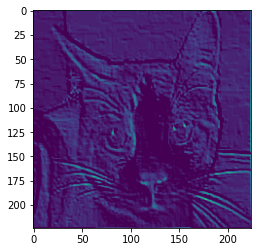

In [ ]:
# Visualizziamo il canale n. 7 della attivazione del primo strato convoluzionalee

plt.imshow(activations[0][0,:,:,7])
plt.show()

In [ ]:
# Visualizziamo tutte le attivazioni.

plot_all_activations(activation_model, img_cat_processed)

Output hidden; open in https://colab.research.google.com to view.

# Visualizzazione filtri

Quello che vogliamo fare ora è cercare di capire meglio gli effetti dei vari filtri, studiamo quali sono le immagini in input che massimizzano la loro attivazione. Per far ciò dovremo implementare a mano un algoritmo di ascesa del gradiente.

In [ ]:
# Usiamo di nuovo VGG16, ma siccome per questo esperimento non abbiamo biosgno degli
# strati fully-connected, la ricarichiamo senza questi ultimi in modo da velocizzare
# l'esecuzione (parametro include_top=False). Inoltre, sempre per scopi di efficienza
# computazionale, la adattiamo a funzionare con immagini più piccole grazie al parametro
# input_shape.

vgg16conv = tf.keras.applications.VGG16(weights='imagenet', input_shape=(64,64,3), include_top=False)
vgg16conv.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Questa funzione normalizza il risultato della procedura di ascesa del gradiente
# in modo da poter essere interpretato come immagine.

def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  x += 0.5
  x = np.clip(x, 0, 1)
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [ ]:
# Algoritmo di ascesa del gradiente che, data una rete neuale, il nome di uno strato
# convoluzionale e il numero di canale, genera una immagine che massimizza il valore
# medio della attivazione. Restituisce anche la storia delle immagini generate
# dall'algoritmo di ascesa del gradiente quando history è True.

def generate_pattern(network, layer_name, filter_index, history = False):
  import tensorflow.keras.backend as K

  size  = network.input.shape[1]
  img_data = np.random.random((1, size, size, 3)) * 100 + 128
  if history:
    img_history = []
    img_history.append(deprocess_image(img_data[0].copy()))

  conv_layer = network.get_layer(layer_name)
  model = tf.keras.models.Model([network.inputs], [conv_layer.output])

  step = 1.0
  for i in range(40):
    images = tf.cast(img_data, tf.float32)
    with tf.GradientTape() as tape:
      tape.watch(images)
      conv_output = model(images)
      loss = K.mean(conv_output[:,:,:,filter_index])
      grads = tape.gradient(loss, images)
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    img_data[0] += grads * step
    if history:
      img_history.append(deprocess_image(img_data[0].copy()))

  return img_history if history else deprocess_image(img_data[0])

In [ ]:
# Applichiamo questa procedura al blocco block5_conv1, primo canale.

img_history = generate_pattern(vgg16conv, 'block4_conv1', 0, True)

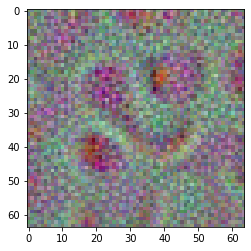

In [ ]:
# Immagine generata finale

plt.imshow(img_history[40])

In [ ]:
# Questo code visualizza tutte le immagini che missimizzano le attivazioni dei vari canali
# di in uno specifico blocco convoluzionale.

def plot_layer_patterns(network, layer_name):
  size = network.input.shape[1]
  margin = 5
  results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3),dtype='uint8')
  for i in range(8):
    for j in range(8):
      filter_img = generate_pattern(network, layer_name, i + (j * 8))
      horizontal_start = i * size + i * margin
      horizontal_end = horizontal_start + size
      vertical_start = j * size + j * margin
      vertical_end = vertical_start + size
      results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
  plt.figure(figsize=(20,20))
  plt.imshow(results)

In [ ]:
# Queste sono le immagini relative al blocco block1_conv1. Si tratta di semplici
# pattern orizzontali, verticali o riempimenti quasi uniformi di colori.

plot_layer_patterns(vgg16conv, 'block1_conv1')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Queste sono le immagini relative al blocco block3_conv1. Si tratta pattern più
# complessi di quelli visti sopra.

plot_layer_patterns(vgg16conv, 'block3_conv1')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Queste sono le immagini relative al blocco block4_conv1. Queste immagini iniziano
# a ricordare dei pattern presenti nel mondo reale (occhi, foglie, etc...)

plot_layer_patterns(vgg16conv, 'block4_conv1')

Output hidden; open in https://colab.research.google.com to view.

# Heatmap

Cerchiamo adesso di individuare qual è la parte di una immagine che maggiormente la porta ad essere classificata in un certo modo. Ci sono molti metodi specifici per farlo. Collettivamente questi metodi sono noti col nome di "class activation map" e consistono del produrre una heatmap delle attivazioni
da sovrapporre all'immagine in input.

Il metodo specifico che usiamo qui è descritto nell'articolo "Grad-CAM: Visual
Explanations from Deep Networks via Gradient-based Localization".

In [9]:
# Facciamo l'upload dell'immagine di un elefante sul computer virtuale dove gira il
# notebook.

!wget 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Loxodontacyclotis.jpg/1920px-Loxodontacyclotis.jpg' -O Elephant.jpg

--2022-03-31 08:23:52--  https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Loxodontacyclotis.jpg/1920px-Loxodontacyclotis.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444980 (435K) [image/jpeg]
Saving to: ‘Elephant.jpg’

Elephant.jpg        100%[===================>] 434.55K  2.23MB/s    in 0.2s    

2022-03-31 08:23:53 (2.23 MB/s) - ‘Elephant.jpg’ saved [444980/444980]



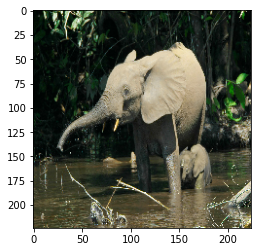

In [10]:
# Carichiamo in memoria l'immagine di cui sopra.

img_ele_path = '/content/Elephant.jpg'
img_ele = image.load_img(img_ele_path, target_size=(224, 224))
plt.imshow(img_ele)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


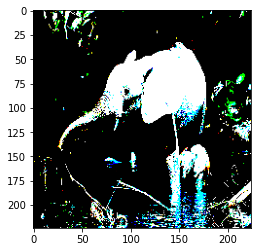

In [11]:
# Eseguiamo il pre-processing dell'immagine.

img_ele_processed = tf.keras.preprocessing.image.img_to_array(img_ele)
img_ele_processed = np.expand_dims(img_ele_processed, axis=0)
img_ele_processed = tf.keras.applications.vgg16.preprocess_input(img_ele_processed)
plt.imshow(img_ele_processed[0])

In [12]:
# L'immagine viene classificata come un elefante africano.

tf.keras.applications.vgg16.decode_predictions(vgg16.predict(img_ele_processed))

49152/35363 [=========================================] - 0s 0us/step


[[('n02504458', 'African_elephant', 0.61742663),
  ('n01871265', 'tusker', 0.25993085),
  ('n02504013', 'Indian_elephant', 0.12112532),
  ('n01698640', 'American_alligator', 0.0005391141),
  ('n02006656', 'spoonbill', 0.00019862258)]]

In [13]:
# Questa è la procedura che genera la heatmap. La heatmap prende l'attivazione di un
# blocco convoluzionale data una immagine di input, e pesa ogni canale con la (media)
# della derivata derivata dell'output della rete rispetto a quel canale.

def heatmap(network, layer_name, img, output):
  import tensorflow.keras.backend as K

  conv_layer = network.get_layer(layer_name)
  model = tf.keras.models.Model([network.inputs], [conv_layer.output, network.output])
  images = tf.cast(img, tf.float32)
  with tf.GradientTape() as tape:
    conv_output, model_output = model(img)
    african_e66lephant_output = model_output[:, output]
    grads = tape.gradient(african_e66lephant_output, conv_output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1))
  conv_output_value = conv_output[0].numpy()
  for i in range(512):
      conv_output_value[:, :, i] *= pooled_grads[i]
  heatmap = np.mean(conv_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  return heatmap

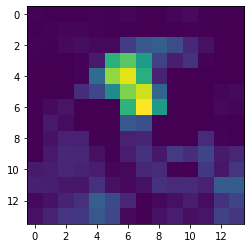

In [14]:
# Questa è la heatmap in questione, calcolata usando l'ultimo blocco convoluzionale.
# Il numero 386 è l'output di VGG 16 corrispondente all'elefante africano.

heatmap_ele = heatmap(vgg16, 'block5_conv3', img_ele_processed, 386)
plt.imshow(heatmap_ele)

In [15]:
# La funzione superimpose prende una immagine e una heatmap e le sovrappone. 
# È stata usanta la colormap 'jet' della libreria CV2, che vuol dire che in bl
# c'è la parte meno significativa per il riconoscimento, in rosso la più singifivativa.

def superimpose(img, heatmap):
  import cv2
  cv2_img = tf.keras.preprocessing.image.img_to_array(img)
  cv2_heatmap = cv2.resize(heatmap, (cv2_img.shape[1], cv2_img.shape[0]))
  cv2_heatmap = np.uint8(255 * cv2_heatmap)
  cv2_heatmap = cv2.applyColorMap(cv2_heatmap, cv2.COLORMAP_JET)
  superimposed_img = np.uint8(cv2_heatmap * 0.5 + cv2_img*0.5)
  return superimposed_img

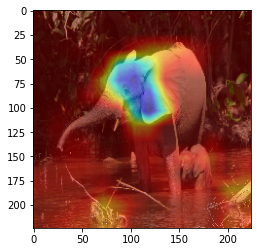

In [16]:
# Si vede che la parte più rilevante per il riconoscimento dell'immagine come elefante
# è stata quella costituita da occhi e orecchie dell'elefante adulto.

plt.imshow(superimpose(img_ele, heatmap_ele))

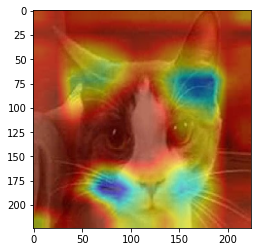

In [22]:
# Ripetendo la stessa cosa con l'immagine del gatto, otteniamo che la parte più rilevante
# sono muso e orecchie. Il numero 285 è il numero del neurone di output corrispondente
# al gatto egiziano.

plt.imshow(superimpose(img_cat, heatmap(vgg16, 'block5_conv3', img_cat_processed, 285)))